In [16]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

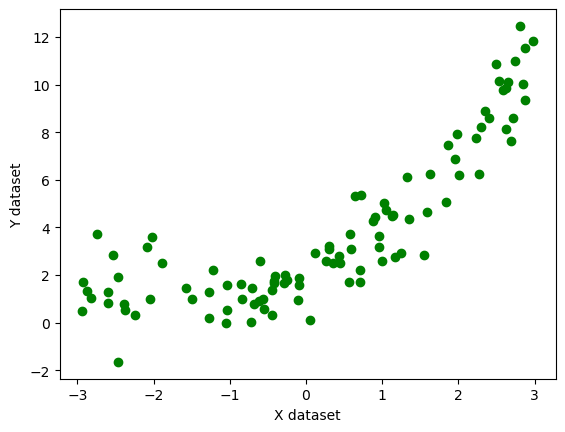

In [17]:
X = 6*np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
## quadratic equation used - y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
## implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [20]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test,regression_1.predict(X_test))
print(sscore)

0.6808821961141955


Text(0, 0.5, 'Y')

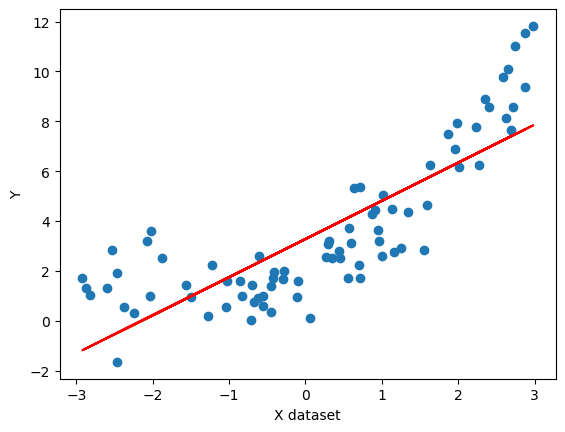

In [22]:
## Visualize
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y")

In [23]:
## apply Ploynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [25]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
X_train_poly

array([[ 1.00000000e+00, -1.03203442e+00,  1.06509504e+00],
       [ 1.00000000e+00,  2.65575438e+00,  7.05303133e+00],
       [ 1.00000000e+00,  2.96103718e-01,  8.76774116e-02],
       [ 1.00000000e+00,  2.98271984e+00,  8.89661762e+00],
       [ 1.00000000e+00,  2.62766120e-01,  6.90460337e-02],
       [ 1.00000000e+00, -2.87520585e+00,  8.26680868e+00],
       [ 1.00000000e+00, -1.88389143e+00,  3.54904690e+00],
       [ 1.00000000e+00,  5.56779590e-02,  3.10003512e-03],
       [ 1.00000000e+00,  2.39818965e+00,  5.75131362e+00],
       [ 1.00000000e+00, -1.57103003e+00,  2.46813536e+00],
       [ 1.00000000e+00,  5.94676966e-01,  3.53640694e-01],
       [ 1.00000000e+00,  7.04071269e-01,  4.95716351e-01],
       [ 1.00000000e+00,  1.86131137e+00,  3.46448002e+00],
       [ 1.00000000e+00, -2.94410739e-01,  8.66776834e-02],
       [ 1.00000000e+00, -7.05344854e-01,  4.97511363e-01],
       [ 1.00000000e+00,  2.87185663e+00,  8.24756048e+00],
       [ 1.00000000e+00, -2.24794060e+00

In [27]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9109569536112274


In [28]:
print(regression.coef_)

[[0.         1.43343471 0.50006202]]


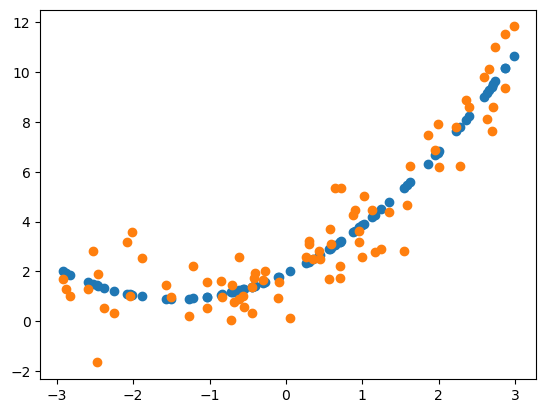

In [29]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [31]:
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [32]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9135448838995438


In [33]:
# Prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

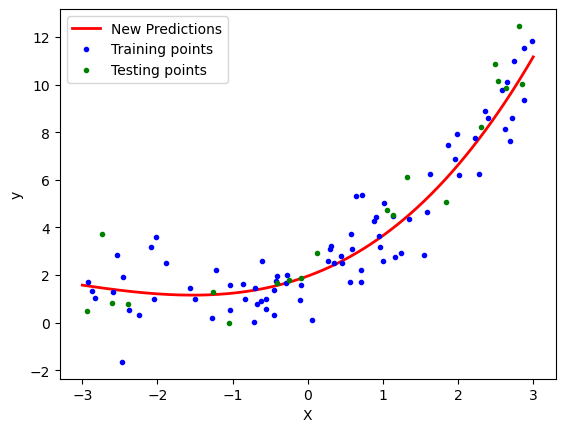

In [37]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="New Predictions")
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,"g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)  ##polynomial feature
    lin_reg = LinearRegression()   ##fit linear regression
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    #plotting
    plt.plot(X_new,y_pred_new,'r',label="Degree "+ str(degree), linewidth=3)
    plt.plot(X_train,y_train,"b.", linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

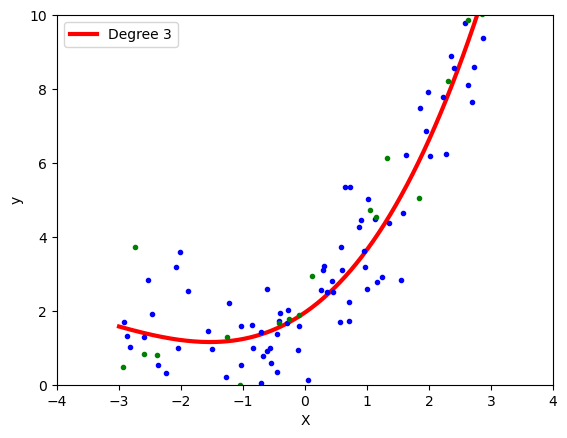

In [40]:
poly_regression(3)   ## blue = training datapoints , ## green - test datapoints, ## red - best fit line